Libraries

In [35]:
!pip install hmmlearn
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import IPython.display as ipd
from IPython.display import display, Audio
import librosa.display
import seaborn as sns
from hmmlearn import hmm
import numpy as np
from scipy.stats import multivariate_normal

Mounting Data

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data paths

In [37]:
blues = '/content/drive/MyDrive/data/blues'
hiphop = '/content/drive/MyDrive/data/hiphop'
metal = '/content/drive/MyDrive/data/metal'
pop = '/content/drive/MyDrive/data/pop'

Preprocess Blues Data and MFCC

In [38]:
signal_blues = [];
mfccs_blues = [];

for i in range(10):
  for j in range(100):
    if j<10:
      y, sr = librosa.load(blues + '/blues.0000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_blues.append(y)
      mfccs_blues.append(librosa.feature.mfcc(y=signal_blues[j], n_mfcc=13, sr=22050))
      mfccs_blues[j].shape
    else:
      y, sr = librosa.load(blues + '/blues.000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_blues.append(y)
      mfccs_blues.append(librosa.feature.mfcc(y=signal_blues[j], n_mfcc=13, sr=22050))
      mfccs_blues[j].shape

Preprocess Hiphop Data and MFCC

In [39]:
signal_hiphop = [];
mfccs_hiphop = [];

for i in range(10):
  for j in range(100):
    if j<10:
      y, sr = librosa.load(hiphop + '/hiphop.0000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_hiphop.append(y)
      mfccs_hiphop.append(librosa.feature.mfcc(y=signal_hiphop[j], n_mfcc=13, sr=22050))
      mfccs_hiphop[j].shape
    else:
      y, sr = librosa.load(hiphop + '/hiphop.000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_hiphop.append(y)
      mfccs_hiphop.append(librosa.feature.mfcc(y=signal_hiphop[j], n_mfcc=13, sr=22050))
      mfccs_hiphop[j].shape

Preprocess Metal Data and MFCC

In [40]:
signal_metal = [];
mfccs_metal = [];

for i in range(10):
  for j in range(100):
    if j<10:
      y, sr = librosa.load(metal + '/metal.0000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_metal.append(y)
      mfccs_metal.append(librosa.feature.mfcc(y=signal_metal[j], n_mfcc=13, sr=22050))
      mfccs_metal[j].shape
    else:
      y, sr = librosa.load(metal + '/metal.000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_metal.append(y)
      mfccs_metal.append(librosa.feature.mfcc(y=signal_metal[j], n_mfcc=13, sr=22050))
      mfccs_metal[j].shape

Preprocess Pop Data and MFCC

In [41]:
signal_pop = [];
mfccs_pop = [];

for i in range(10):
  for j in range(100):
    if j<10:
      y, sr = librosa.load(pop + '/pop.0000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_pop.append(y)
      mfccs_pop.append(librosa.feature.mfcc(y=signal_pop[j], n_mfcc=13, sr=22050))
      mfccs_pop[j].shape
    else:
      y, sr = librosa.load(pop + '/pop.000' + str(j) + '.wav', sr=22050, mono=True, offset=i*3, duration=3)
      signal_pop.append(y)
      mfccs_pop.append(librosa.feature.mfcc(y=signal_pop[j], n_mfcc=13, sr=22050))
      mfccs_pop[j].shape

Blues Sample HeatMap Plot

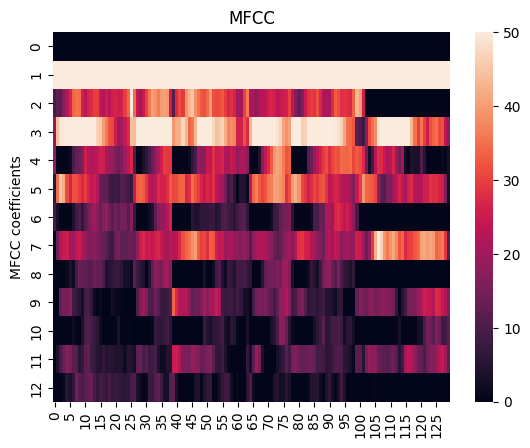

In [42]:
ax = sns.heatmap(mfccs_blues[1], vmin=0, vmax=50)
plt.title('MFCC')
plt.ylabel('MFCC coefficients')
plt.show()

Hiphop Sample HeatMap Plot

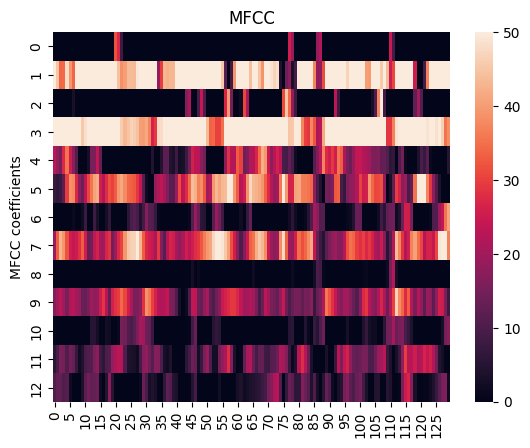

In [43]:
ax = sns.heatmap(mfccs_hiphop[1], vmin=0, vmax=50)
plt.title('MFCC')
plt.ylabel('MFCC coefficients')
plt.show()

Metal Sample HeatMap Plot

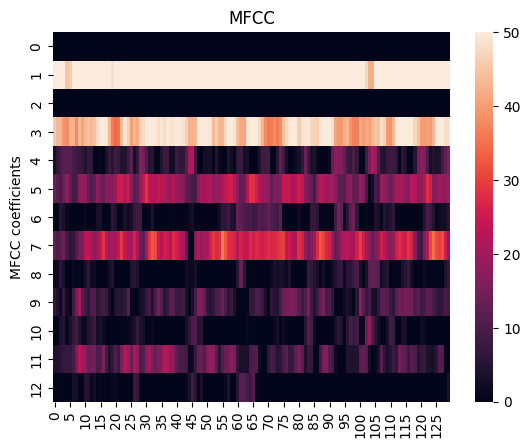

In [44]:
ax = sns.heatmap(mfccs_metal[1], vmin=0, vmax=50)
plt.title('MFCC')
plt.ylabel('MFCC coefficients')
plt.show()

Pop Sample HeatMap Plot

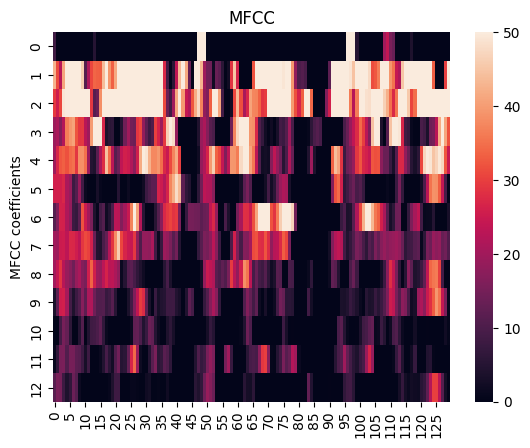

In [45]:
ax = sns.heatmap(mfccs_pop[1], vmin=0, vmax=50)
plt.title('MFCC')
plt.ylabel('MFCC coefficients')
plt.show()

Train data

In [46]:
lengths_blues = []
tmp = mfccs_blues[0]
lengths_blues.append(len(mfccs_blues[0]))
for i in range(799):
  mfccs_blues_c = np.concatenate([tmp, mfccs_blues[i+1]])
  tmp = mfccs_blues_c
  lengths_blues.append(len(mfccs_blues[i+1]))

lengths_hiphop = []
tmp = mfccs_hiphop[0]
lengths_hiphop.append(len(mfccs_hiphop[0]))
for i in range(799):
  mfccs_hiphop_c = np.concatenate([tmp, mfccs_hiphop[i+1]])
  tmp = mfccs_hiphop_c
  lengths_hiphop.append(len(mfccs_hiphop[i+1]))

lengths_metal = []
tmp = mfccs_metal[0]
lengths_metal.append(len(mfccs_metal[0]))
for i in range(799):
  mfccs_metal_c = np.concatenate([tmp, mfccs_metal[i+1]])
  tmp = mfccs_metal_c
  lengths_metal.append(len(mfccs_metal[i+1]))

lengths_pop = []
tmp = mfccs_pop[0]
lengths_pop.append(len(mfccs_pop[0]))
for i in range(799):
  mfccs_pop_c = np.concatenate([tmp, mfccs_pop[i+1]])
  tmp = mfccs_pop_c
  lengths_pop.append(len(mfccs_pop[i+1]))

Implementing Model With Libraries

In [13]:
hmm_models = []
hmm_trainer = hmm.GaussianHMM(n_components=20, covariance_type='diag', n_iter=1000)
hmm_trainer.fit(mfccs_blues_c,lengths_blues)
hmm_models.append((hmm_trainer, 'blues'))

hmm_trainer = hmm.GaussianHMM(n_components=20, covariance_type='diag', n_iter=1000)
hmm_trainer.fit(mfccs_hiphop_c,lengths_hiphop)
hmm_models.append((hmm_trainer, 'hiphop'))

hmm_trainer = hmm.GaussianHMM(n_components=20, covariance_type='diag', n_iter=1000)
hmm_trainer.fit(mfccs_metal_c,lengths_metal)
hmm_models.append((hmm_trainer, 'metal'))

hmm_trainer = hmm.GaussianHMM(n_components=20, covariance_type='diag', n_iter=1000)
hmm_trainer.fit(mfccs_pop_c,lengths_pop)
hmm_models.append((hmm_trainer, 'pop'))

Test data and Score

In [47]:
test_blues = []
for i in range(800, 1000):
  score_blues = hmm_models[0][0].score(mfccs_blues[i])
  score_hiphop = hmm_models[1][0].score(mfccs_blues[i])
  score_metal = hmm_models[2][0].score(mfccs_blues[i])
  score_pop = hmm_models[3][0].score(mfccs_blues[i])
  max_score = max(score_blues, score_hiphop, score_metal, score_pop)
  if max_score == score_blues:
    test_blues.append(0)
  elif max_score == score_hiphop:
    test_blues.append(1)
  elif max_score == score_metal:
    test_blues.append(2)
  elif max_score == score_pop:
    test_blues.append(3)

test_hiphop = []
for i in range(800, 1000):
  score_blues = hmm_models[0][0].score(mfccs_hiphop[i])
  score_hiphop = hmm_models[1][0].score(mfccs_hiphop[i])
  score_metal = hmm_models[2][0].score(mfccs_hiphop[i])
  score_pop = hmm_models[3][0].score(mfccs_hiphop[i])
  max_score = max(score_blues, score_hiphop, score_metal, score_pop)
  if max_score == score_blues:
    test_hiphop.append(0)
  elif max_score == score_hiphop:
    test_hiphop.append(1)
  elif max_score == score_metal:
    test_hiphop.append(2)
  elif max_score == score_pop:
    test_hiphop.append(3)

test_metal = []
for i in range(800, 1000):
  score_blues = hmm_models[0][0].score(mfccs_metal[i])
  score_hiphop = hmm_models[1][0].score(mfccs_metal[i])
  score_metal = hmm_models[2][0].score(mfccs_metal[i])
  score_pop = hmm_models[3][0].score(mfccs_metal[i])
  max_score = max(score_blues, score_hiphop, score_metal, score_pop)
  if max_score == score_blues:
    test_metal.append(0)
  elif max_score == score_hiphop:
    test_metal.append(1)
  elif max_score == score_metal:
    test_metal.append(2)
  elif max_score == score_pop:
    test_metal.append(3)

test_pop = []
for i in range(800, 1000):
  score_blues = hmm_models[0][0].score(mfccs_pop[i])
  score_hiphop = hmm_models[1][0].score(mfccs_pop[i])
  score_metal = hmm_models[2][0].score(mfccs_pop[i])
  score_pop = hmm_models[3][0].score(mfccs_pop[i])
  max_score = max(score_blues, score_hiphop, score_metal, score_pop)
  if max_score == score_blues:
    test_pop.append(0)
  elif max_score == score_hiphop:
    test_pop.append(1)
  elif max_score == score_metal:
    test_pop.append(2)
  elif max_score == score_pop:
    test_pop.append(3)

Model Evaluation

In [48]:
accuracy = ((test_blues.count(0)+test_hiphop.count(1)+test_metal.count(2)+test_pop.count(3))/(200+200+200+200))*100
print('Accuracy percentage is: '+str(accuracy))
precision_blues = ((test_blues.count(0))/(test_blues.count(0)+test_hiphop.count(0)+test_metal.count(0)+test_pop.count(0)))*100
print('Precision percentage for blues genre is: '+str(precision_blues))
precision_hiphop = ((test_hiphop.count(1))/(test_blues.count(1)+test_hiphop.count(1)+test_metal.count(1)+test_pop.count(1)))*100
print('Precision percentage for hiphop genre is: '+str(precision_hiphop))
precision_metal = ((test_metal.count(2))/(test_blues.count(2)+test_hiphop.count(2)+test_metal.count(2)+test_pop.count(2)))*100
print('Precision percentage for metal genre is: '+str(precision_metal))
precision_pop = ((test_pop.count(3))/(test_blues.count(3)+test_hiphop.count(3)+test_metal.count(3)+test_pop.count(3)))*100
print('Precision percentage for pop genre is: '+str(precision_pop))
recall_blues = ((test_blues.count(0))/(200))*100
print('Recall percentage for blues genre is: '+str(recall_blues))
recall_hiphop = ((test_hiphop.count(1))/(200))*100
print('Recall percentage for hiphop genre is: '+str(recall_hiphop))
recall_metal = ((test_metal.count(2))/(200))*100
print('Recall percentage for metal genre is: '+str(recall_metal))
recall_pop = ((test_pop.count(3))/(200))*100
print('Recall percentage for pop genre is: '+str(recall_pop))
F1_score_blues = (2*(precision_blues*recall_blues))/(precision_blues+recall_blues)
print('F1 Score percentage for blues genre is: '+str(F1_score_blues))
F1_score_hiphop = (2*(precision_hiphop*recall_hiphop))/(precision_hiphop+recall_hiphop)
print('F1 Score percentage for hiphop genre is: '+str(F1_score_hiphop))
F1_score_metal = (2*(precision_metal*recall_metal))/(precision_metal+recall_metal)
print('F1 Score percentage for metal genre is: '+str(F1_score_metal))
F1_score_pop = (2*(precision_pop*recall_pop))/(precision_pop+recall_pop)
print('F1 Score percentage for pop genre is: '+str(F1_score_pop))
MA_precision = (precision_blues+precision_hiphop+precision_metal+precision_pop)/(4)
print('Macro-averaging precision percentage is: '+str(MA_precision))
MA_recall = (recall_blues+recall_hiphop+recall_metal+recall_pop)/(4)
print('Macro-averaging recall percentage is: '+str(MA_recall))
MA_F1 = (F1_score_blues+F1_score_hiphop+F1_score_metal+F1_score_pop)/(4)
print('Macro-averaging F1 percentage is: '+str(MA_F1))
W_A_precision = (200*precision_blues+200*precision_hiphop+200*precision_metal+200*precision_pop)/(800)
print('Weighted-averaging precision percentage is: '+str(W_A_precision))
W_A_recall = (200*recall_blues+200*recall_hiphop+200*recall_metal+200*recall_pop)/(800)
print('Weighted-averaging recall percentage is: '+str(W_A_recall))
W_A_F1 = (200*F1_score_blues+200*F1_score_hiphop+200*F1_score_metal+200*F1_score_pop)/(800)
print('Weighted-averaging F1 percentage is: '+str(W_A_F1))
MiA_precision = ((test_blues.count(0)+test_hiphop.count(1)+test_metal.count(2)+test_pop.count(3))/(test_blues.count(0)+test_hiphop.count(0)+test_metal.count(0)+test_pop.count(0)+test_blues.count(1)+test_hiphop.count(1)+test_metal.count(1)+test_pop.count(1)+test_blues.count(2)+test_hiphop.count(2)+test_metal.count(2)+test_pop.count(2)+test_blues.count(3)+test_hiphop.count(3)+test_metal.count(3)+test_pop.count(3)))*100
print('Micro-averaging precision percentage is: '+str(MiA_precision))
MiA_recall = ((test_blues.count(0)+test_hiphop.count(1)+test_metal.count(2)+test_pop.count(3))/(800))*100
print('Micro-averaging Recall percentage is: '+str(MiA_recall))
MiA_F1 = (2*(MiA_precision*MiA_recall))/(MiA_precision+MiA_recall)
print('Micro-averaging F1 percentage is: '+str(MiA_F1))

Accuracy percentage is: 84.5
Precision percentage for blues genre is: 81.0
Precision percentage for hiphop genre is: 94.28571428571428
Precision percentage for metal genre is: 78.68852459016394
Precision percentage for pop genre is: 87.96296296296296
Recall percentage for blues genre is: 81.0
Recall percentage for hiphop genre is: 66.0
Recall percentage for metal genre is: 96.0
Recall percentage for pop genre is: 95.0
F1 Score percentage for blues genre is: 81.0
F1 Score percentage for hiphop genre is: 77.6470588235294
F1 Score percentage for metal genre is: 86.4864864864865
F1 Score percentage for pop genre is: 91.34615384615385
Macro-averaging precision percentage is: 85.48430045971028
Macro-averaging recall percentage is: 84.5
Macro-averaging F1 percentage is: 84.11992478904244
Weighted-averaging precision percentage is: 85.48430045971028
Weighted-averaging recall percentage is: 84.5
Weighted-averaging F1 percentage is: 84.11992478904243
Micro-averaging precision percentage is: 84.5

Confusion Matrix Plot

Text(50.722222222222214, 0.5, 'Predicted Class')

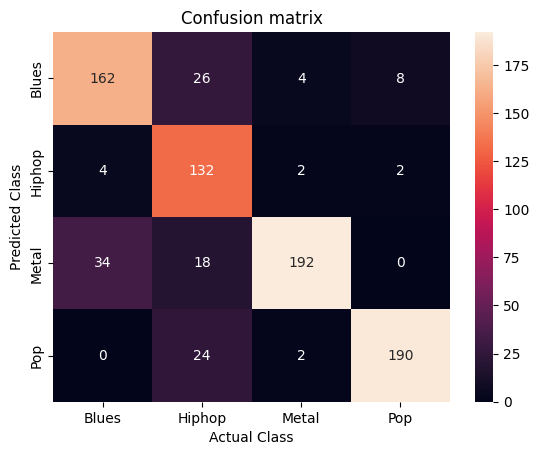

In [49]:
array = [[test_blues.count(0),test_hiphop.count(0),test_metal.count(0),test_pop.count(0)],
        [test_blues.count(1),test_hiphop.count(1),test_metal.count(1),test_pop.count(1)],
        [test_blues.count(2),test_hiphop.count(2),test_metal.count(2),test_pop.count(2)],
        [test_blues.count(3),test_hiphop.count(3),test_metal.count(3),test_pop.count(3)],]
data_frame = pd.DataFrame(array, index = [i for i in ['Blues','Hiphop','Metal','Pop']], columns = [j for j in ['Blues','Hiphop','Metal','Pop']])
sns.heatmap(data_frame, annot=True, fmt="g")
plt.title('Confusion matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

Implementing From Scratch

In [17]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, 0] = self.initial_prob*observation_matrix[:, 0]
            else:
                alpha[:, t] = observation_matrix[:, t]*np.sum(alpha[:, t-1]*self.transition_matrix[:, t-1])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.sum(beta[:, t+1]*self.transition_matrix[:, t]*observation_matrix[:, t])
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs[s], self.mean[:, s], self.covariances[:, s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = alpha[:, t]*self.transition_matrix[:, t]*B[t, :]*beta[:, t]
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t]*beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:, -1]*beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood
